In [10]:
with open("inputs/Day_11.txt") as f:
    raw_input_data = f.read()

In [48]:
from collections import defaultdict
from operator import add

def part_1_solution(raw_input):
    puzzle_input = list(map(int, raw_input.split(',')))
    visited = run_robot_simulation(puzzle_input)
    
    return len(visited)


def run_robot_simulation(program):
    grid = defaultdict(int)
    current_panel = (0, 0)
    direction = (0, 1)
    robot = computer(program)
    next(robot)
    visited = set()
    
    while True:
        old_panel_color = grid[current_panel]
        
        try:
            new_panel_color = robot.send(old_panel_color)
            turn_side = next(robot)
            next(robot)
        except StopIteration:
            return visited

        grid[current_panel] = new_panel_color
        direction = change_direction(direction, turn_side)

        visited.add(current_panel)
        current_panel = tuple(map(add, current_panel, direction))


change_dir_right = {
    (0, 1): (1, 0),
    (1, 0): (0, -1),
    (0, -1): (-1, 0),
    (-1, 0): (0, 1)
}

# opposite to right
change_dir_left = {v:k for k, v in change_dir_right.items()}

def change_direction(current_direction, side):
    if side == 1:
        return change_dir_right[current_direction]
    
    if side == 0:
        return change_dir_left[current_direction]
    
    print(f"[ERROR] Wrong code for direction change: {side}")

def computer(sequence):
    index = 0
    relative_base = 0
    memory = defaultdict(int)
    
    for i, value in enumerate(sequence):
        memory[i] = value
        
    diag_nbr = None
    while True:
        opt_code = memory[index]
        opt_code_with_modes = str(opt_code).zfill(5)
        opt_code = int(opt_code_with_modes[-2:])
        modes = opt_code_with_modes[:-2]
        
        
        par_1_address = get_parameter_address(memory, modes[-1], index + 1, relative_base)
        par_2_address = get_parameter_address(memory, modes[-2], index + 2, relative_base)
        par_3_address = get_parameter_address(memory, modes[-3], index + 3, relative_base)
        
        par_1 = memory[par_1_address]
        par_2 = memory[par_2_address]
        
        if opt_code == 99:
            break
#             return diag_nbr
        elif opt_code == 3:
            # input
            target_address = par_1_address
#             memory[target_address] = yield diag_nbr
            memory[target_address] = yield diag_nbr
            index += 2
        elif opt_code == 4:
            # output
            diag_nbr = par_1
#             print(diag_nbr, end=" ")
            yield diag_nbr
            index += 2
        elif opt_code == 1:
            target_address = par_3_address
            memory[target_address] = par_1 + par_2
            index += 4
        elif opt_code == 2:
            target_address = par_3_address
            memory[target_address] = par_1 * par_2
            index += 4
        elif opt_code == 5:
            if par_1 != 0:
                index = par_2
            else:
                index += 3
        elif opt_code == 6:
            if par_1 == 0:
                index = par_2
            else:
                index += 3
        elif opt_code == 7:
            target_address = par_3_address
            memory[target_address] = 1 if par_1 < par_2 else 0
            index += 4
        elif opt_code == 8:
            target_address = par_3_address
            memory[target_address] = 1 if par_1 == par_2 else 0
            index += 4
        elif opt_code == 9:
            relative_base += par_1
            index += 2
        else:
            print(f"Wrong code: {opt_code}")
            
    
    yield diag_nbr

            
def get_parameter_address(memory, mode, par_index, relative_base):
    if mode == "0":
        return memory[par_index]
    elif mode == "1":
        return par_index
    elif mode == "2":
        return relative_base + memory[par_index]
    else:
        print(f"[ERROR] Wrong mode code: {mode}")

In [49]:
print(f"Part 1 solution: {part_1_solution(raw_input_data)}")

Part 1 solution: 1564


In [60]:
from collections import defaultdict
from operator import add
import matplotlib.pyplot as plt

def part_2_solution(raw_input):
    puzzle_input = list(map(int, raw_input.split(',')))
    grid = run_robot_simulation(puzzle_input)
    white_x = list()
    white_y = list()
    for point, color in grid.items():
        if color:
            x, y = point
            white_x.append(x)
            white_y.append(y)
            
    plt.rcParams["figure.figsize"] = (20,3)
    plt.scatter(white_x, white_y)
    plt.show()
    
#     return len(visited)


def run_robot_simulation(program):
    grid = defaultdict(int)
    current_panel = (0, 0)
    grid[current_panel] = 1
    direction = (0, 1)
    robot = computer(program)
    next(robot)
    visited = set()
    
    while True:
        old_panel_color = grid[current_panel]
        
        try:
            new_panel_color = robot.send(old_panel_color)
            turn_side = next(robot)
            next(robot)
        except StopIteration:
            return grid

        grid[current_panel] = new_panel_color
        direction = change_direction(direction, turn_side)

        visited.add(current_panel)
        current_panel = tuple(map(add, current_panel, direction))


change_dir_right = {
    (0, 1): (1, 0),
    (1, 0): (0, -1),
    (0, -1): (-1, 0),
    (-1, 0): (0, 1)
}

# opposite to right
change_dir_left = {v:k for k, v in change_dir_right.items()}

def change_direction(current_direction, side):
    if side == 1:
        return change_dir_right[current_direction]
    
    if side == 0:
        return change_dir_left[current_direction]
    
    print(f"[ERROR] Wrong code for direction change: {side}")

def computer(sequence):
    index = 0
    relative_base = 0
    memory = defaultdict(int)
    
    for i, value in enumerate(sequence):
        memory[i] = value
        
    diag_nbr = None
    while True:
        opt_code = memory[index]
        opt_code_with_modes = str(opt_code).zfill(5)
        opt_code = int(opt_code_with_modes[-2:])
        modes = opt_code_with_modes[:-2]
        
        
        par_1_address = get_parameter_address(memory, modes[-1], index + 1, relative_base)
        par_2_address = get_parameter_address(memory, modes[-2], index + 2, relative_base)
        par_3_address = get_parameter_address(memory, modes[-3], index + 3, relative_base)
        
        par_1 = memory[par_1_address]
        par_2 = memory[par_2_address]
        
        if opt_code == 99:
            break
#             return diag_nbr
        elif opt_code == 3:
            # input
            target_address = par_1_address
#             memory[target_address] = yield diag_nbr
            memory[target_address] = yield diag_nbr
            index += 2
        elif opt_code == 4:
            # output
            diag_nbr = par_1
#             print(diag_nbr, end=" ")
            yield diag_nbr
            index += 2
        elif opt_code == 1:
            target_address = par_3_address
            memory[target_address] = par_1 + par_2
            index += 4
        elif opt_code == 2:
            target_address = par_3_address
            memory[target_address] = par_1 * par_2
            index += 4
        elif opt_code == 5:
            if par_1 != 0:
                index = par_2
            else:
                index += 3
        elif opt_code == 6:
            if par_1 == 0:
                index = par_2
            else:
                index += 3
        elif opt_code == 7:
            target_address = par_3_address
            memory[target_address] = 1 if par_1 < par_2 else 0
            index += 4
        elif opt_code == 8:
            target_address = par_3_address
            memory[target_address] = 1 if par_1 == par_2 else 0
            index += 4
        elif opt_code == 9:
            relative_base += par_1
            index += 2
        else:
            print(f"Wrong code: {opt_code}")
            
    
    yield diag_nbr

            
def get_parameter_address(memory, mode, par_index, relative_base):
    if mode == "0":
        return memory[par_index]
    elif mode == "1":
        return par_index
    elif mode == "2":
        return relative_base + memory[par_index]
    else:
        print(f"[ERROR] Wrong mode code: {mode}")

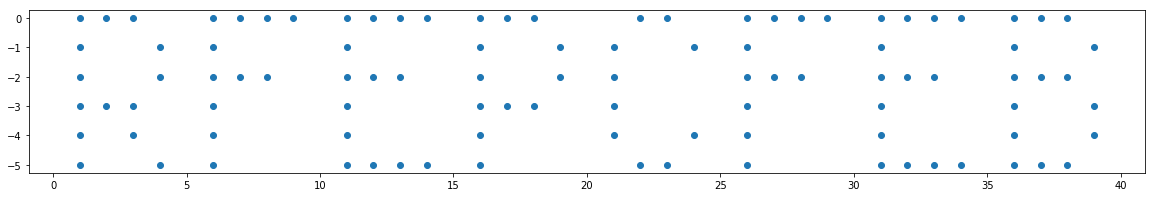

In [62]:
part_2_solution(raw_input_data)